In [53]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns" , 50)
from collections import Counter
from sklearn.metrics import accuracy_score, f1_score,confusion_matrix,classification_report,roc_auc_score,roc_curve,auc
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import recall_score, precision_score
from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_csv("D:\Capstone Project\Training_Dataset_v2.csv")
df.head()

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,potential_issue,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,1026827,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,0.0,-99.00,-99.00,0.0,No,No,No,Yes,No,No
1,1043384,2.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,0.0,0.99,0.99,0.0,No,No,No,Yes,No,No
2,1043696,2.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No
3,1043852,7.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,No,0.0,0.10,0.13,0.0,No,No,No,Yes,No,No
4,1044048,8.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2.0,No,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No


In [3]:
#making it Nan first and then replacing to avoid misinterpretation

df['perf_6_month_avg'].replace(-99,np.NaN, inplace=True)
df['perf_12_month_avg'].replace(-99,np.NaN,inplace=True)

In [4]:
# Checking the percentage of missing values

round(100*(df.isnull().sum()/len(df.index)), 2)

sku                  0.00
national_inv         0.00
lead_time            5.98
in_transit_qty       0.00
forecast_3_month     0.00
forecast_6_month     0.00
forecast_9_month     0.00
sales_1_month        0.00
sales_3_month        0.00
sales_6_month        0.00
sales_9_month        0.00
min_bank             0.00
potential_issue      0.00
pieces_past_due      0.00
perf_6_month_avg     7.67
perf_12_month_avg    7.23
local_bo_qty         0.00
deck_risk            0.00
oe_constraint        0.00
ppap_risk            0.00
stop_auto_buy        0.00
rev_stop             0.00
went_on_backorder    0.00
dtype: float64

In [5]:
## Lets fill the nan's for lead_time, perf_6_month_avg and perf_12_month_avg

df["lead_time"] = df["lead_time"].fillna(df["lead_time"].median())
df["perf_6_month_avg"] = df["perf_6_month_avg"].fillna(df["perf_6_month_avg"].median())
df["perf_12_month_avg"] = df["perf_12_month_avg"].fillna(df["perf_12_month_avg"].median())

In [6]:
## These 1 in the above features represent to their last row 

df.tail()

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,potential_issue,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
1687856,1373987,-1.0,8.0,0.0,5.0,7.0,9.0,1.0,3.0,3.0,8.0,0.0,No,0.0,0.85,0.83,1.0,No,No,No,Yes,No,No
1687857,1524346,-1.0,9.0,0.0,7.0,9.0,11.0,0.0,8.0,11.0,12.0,0.0,No,0.0,0.86,0.84,1.0,Yes,No,No,No,No,Yes
1687858,1439563,62.0,9.0,16.0,39.0,87.0,126.0,35.0,63.0,153.0,205.0,12.0,No,0.0,0.86,0.84,6.0,No,No,No,Yes,No,No
1687859,1502009,19.0,4.0,0.0,0.0,0.0,0.0,2.0,7.0,12.0,20.0,1.0,No,0.0,0.73,0.78,1.0,No,No,No,Yes,No,No
1687860,(1687860 rows),NaN,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.85,0.83,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
## This last row considered to be invalid and can be removed 

df = df.dropna()

In [8]:
df["potential_issue"] = df["potential_issue"].replace({"Yes" : 1 , "No" : 0}).astype(int)
df["deck_risk"] = df["deck_risk"].replace({"Yes" : 1 , "No" : 0}).astype(int)
df["oe_constraint"] = df["oe_constraint"].replace({"Yes" : 1 , "No" : 0}).astype(int)
df["ppap_risk"] = df["ppap_risk"].replace({"Yes" : 1 , "No" : 0}).astype(int)
df["stop_auto_buy"] = df["stop_auto_buy"].replace({"Yes" : 1 , "No" : 0}).astype(int)
df["rev_stop"] = df["rev_stop"].replace({"Yes" : 1 , "No" : 0}).astype(int)
df["went_on_backorder"] = df["went_on_backorder"].replace({"Yes" : 1 , "No" : 0}).astype(int)

In [9]:
df.head(5)

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,potential_issue,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,1026827,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.85,0.83,0.0,0,0,0,1,0,0
1,1043384,2.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.99,0.99,0.0,0,0,0,1,0,0
2,1043696,2.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.85,0.83,0.0,1,0,0,1,0,0
3,1043852,7.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,0.10,0.13,0.0,0,0,0,1,0,0
4,1044048,8.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2.0,0,0.0,0.85,0.83,0.0,1,0,0,1,0,0


In [10]:
df.shape

(1687860, 23)

## Splitting the data

In [11]:
X = df.drop(['went_on_backorder','sku'],axis=1)
y = df["went_on_backorder"]

In [12]:
# Splitting the data into train and test

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

In [13]:
### VIF 

def vif_cal(input_data, dependent_col):
    vif_df = pd.DataFrame( columns = ['Var', 'Vif'])
    x_vars=input_data.drop([dependent_col], axis=1)
    xvar_names=x_vars.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.OLS(y,x).fit().rsquared  
        vif=round(1/(1-rsq),2)
        vif_df.loc[i] = [xvar_names[i], vif]
    return vif_df.sort_values(by = 'Vif', axis=0, ascending=False, inplace=False)

In [15]:
df.columns

Index(['sku', 'national_inv', 'lead_time', 'in_transit_qty',
       'forecast_3_month', 'forecast_6_month', 'forecast_9_month',
       'sales_1_month', 'sales_3_month', 'sales_6_month', 'sales_9_month',
       'min_bank', 'potential_issue', 'pieces_past_due', 'perf_6_month_avg',
       'perf_12_month_avg', 'local_bo_qty', 'deck_risk', 'oe_constraint',
       'ppap_risk', 'stop_auto_buy', 'rev_stop', 'went_on_backorder'],
      dtype='object')

In [18]:
import statsmodels.api as sm

In [19]:
# Calculating Vif value
vif_cal(input_data=df.drop(['sku'], axis=1), dependent_col='went_on_backorder')

,Var,Vif
4,forecast_6_month,473.88
5,forecast_9_month,267.38
8,sales_6_month,98.12
14,perf_12_month_avg,97.69
13,perf_6_month_avg,93.97
3,forecast_3_month,91.75
7,sales_3_month,61.80
9,sales_9_month,20.77
19,stop_auto_buy,10.43
6,sales_1_month,7.63


In [20]:
##  we can remove the top 9 features as they are highly correlated 

## lets use K-fold 

In [24]:
X1 = df.drop(['went_on_backorder',"sku","forecast_6_month","forecast_9_month","sales_6_month","perf_12_month_avg","perf_6_month_avg","forecast_3_month","sales_3_month","sales_9_month","stop_auto_buy"],axis=1)
y1 = df['went_on_backorder']

In [25]:
X1.head()

,national_inv,lead_time,in_transit_qty,sales_1_month,min_bank,potential_issue,pieces_past_due,local_bo_qty,deck_risk,oe_constraint,ppap_risk,rev_stop
0,0.0,8.0,0.0,0.0,0.0,0,0.0,0.0,0,0,0,0
1,2.0,9.0,0.0,0.0,0.0,0,0.0,0.0,0,0,0,0
2,2.0,8.0,0.0,0.0,0.0,0,0.0,0.0,1,0,0,0
3,7.0,8.0,0.0,0.0,1.0,0,0.0,0.0,0,0,0,0
4,8.0,8.0,0.0,0.0,2.0,0,0.0,0.0,1,0,0,0


In [26]:
X1['national_inv']= np.log1p(X1['national_inv']+np.abs(X1['national_inv'].min()))

In [27]:
#Similarly Transforming other numerical varibales 

for i in (['lead_time', 'in_transit_qty', 'sales_1_month', 'min_bank', 'potential_issue', 'pieces_past_due', 'local_bo_qty', 'deck_risk', 'oe_constraint', 'ppap_risk', 'rev_stop',]):
    print(f'{i}, transformed skewness : {np.log1p(X1[i]).skew()}')
    X1[i] = np.log1p(X1[i])

lead_time, transformed skewness : -0.16949217958387278
in_transit_qty, transformed skewness : 2.624684860924265
sales_1_month, transformed skewness : 1.763138682441691
min_bank, transformed skewness : 1.6877175202600418
potential_issue, transformed skewness : 43.103711789548534
pieces_past_due, transformed skewness : 11.717299034504041
local_bo_qty, transformed skewness : 14.064753768697146
deck_risk, transformed skewness : 1.286055680937786
oe_constraint, transformed skewness : 82.98335299658962
ppap_risk, transformed skewness : 2.327643294041301
rev_stop, transformed skewness : 48.020605370305304


In [28]:
from sklearn.preprocessing import MinMaxScaler

In [29]:
mm = MinMaxScaler()

In [30]:
#Scaling the variables between 0 and 1
X_sc = mm.fit_transform(X1)


In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn import model_selection
from sklearn.model_selection import cross_val_score

In [32]:
rf=RandomForestClassifier()

In [33]:
models = []
#models.append(('Logistic Regression', lr))
#models.append(('knn', knn))
#models.append(('nb', nb))
#models.append(('dt', dt))
models.append(('rf', rf))
models

[('rf', RandomForestClassifier())]

## Accuracy scores 

rf: 0.993257 (0.000000)


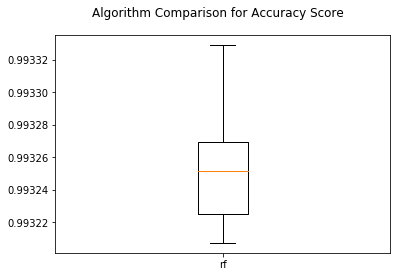

In [39]:
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = StratifiedKFold(n_splits=5,shuffle=True,random_state=14)
	cv_results = model_selection.cross_val_score(model, X_sc, y1, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, np.mean(cv_results), cv_results.var())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison for Accuracy Score')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

## Recall Scores

rf: 0.086426 (0.000043)


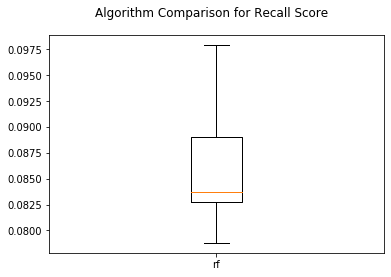

In [40]:
# evaluate each model in turn
results = []
names = []
scoring = 'recall'
for name, model in models:
	kfold = kfold = StratifiedKFold(n_splits=5,shuffle=True,random_state=14)
	cv_results = model_selection.cross_val_score(model, X_sc, y1, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, np.mean(cv_results), cv_results.var())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison for Recall Score')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

## Precision scores

rf: 0.482753 (0.000598)


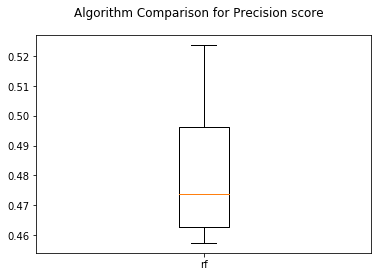

In [41]:
# evaluate each model in turn
results = []
names = []
scoring = 'precision'
for name, model in models:
	kfold = StratifiedKFold(n_splits=5,shuffle=True,random_state=14)
	cv_results = model_selection.cross_val_score(model, X_sc, y1, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, np.mean(cv_results), cv_results.var())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison for Precision score')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

### ROC_AUC 

In [44]:
X1.columns

Index(['national_inv', 'lead_time', 'in_transit_qty', 'sales_1_month',
       'min_bank', 'potential_issue', 'pieces_past_due', 'local_bo_qty',
       'deck_risk', 'oe_constraint', 'ppap_risk', 'rev_stop'],
      dtype='object')

In [45]:
X_sc = pd.DataFrame(X_sc,columns=X1.columns)

In [46]:
X_sc.head()

,national_inv,lead_time,in_transit_qty,sales_1_month,min_bank,potential_issue,pieces_past_due,local_bo_qty,deck_risk,oe_constraint,ppap_risk,rev_stop
0,0.625413,0.553416,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.625418,0.579954,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.625418,0.553416,0.0,0.0,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.625429,0.553416,0.0,0.0,0.054773,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.625431,0.553416,0.0,0.0,0.086813,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [47]:
kfold = StratifiedKFold(n_splits=5,shuffle=True,random_state=14)
for_plot = []
for name, model in models:
    roc_auc = []
    for train, test in kfold.split(X_sc,y1):
        Xtrain, Xtest = X_sc.iloc[train,:],X_sc.iloc[test,:] 
        Ytrain,Ytest = y1[train], y1[test]
        model.fit(Xtrain,Ytrain)
        Y_pred = model.predict(Xtest)
        fpr,tpr, _ =roc_curve(Ytest,Y_pred)
        roc_auc.append(auc(fpr, tpr))
        for_plot.append(auc(fpr, tpr))
    print('AUC scores: %0.2f (+/- %0.5f) [%s]' %(np.mean(roc_auc), np.var(roc_auc,ddof = 1), name))

AUC scores: 0.54 (+/- 0.00001) [rf]


### Threshold optimization 

In [48]:
RF2 = RandomForestClassifier()

In [49]:
models2 =  []
models2.append(('RandomForest', RF2))
models2

[('RandomForest', RandomForestClassifier())]

In [50]:
skfold = StratifiedKFold(n_splits=10,shuffle=True,random_state=14)
for name, model in models2:
    positive_proba_list = []
    roc_auc = []
    best_threshold = []
       
    for train, test in skfold.split(X_sc,y1):
        Xtrain, Xtest = X.iloc[train,:],X.iloc[test,:] 
        Ytrain,Ytest = y1[train], y1[test]
        model.fit(Xtrain,Ytrain)
        Y_predict = model.predict(Xtest)
        #positive probabilities
        y_proba = model.predict_proba(Xtest)[:,1]
        positive_proba_list.append(y_proba)
        
        fpr_au,tpr_au, thresh_au =roc_curve(Ytest,Y_predict)
        fpr,tpr, thresh =roc_curve(Ytest,y_proba)
        #thresholds
        j= tpr - fpr
        ind = np.argmax(j)
        b_thresh = thresh[ind]
        best_threshold.append(b_thresh)
        roc_auc.append(auc(fpr_au, tpr_au))
    #print('AUC scores: %0.2f (+/- %0.5f) [%s]' %(np.mean(roc_auc), np.var(roc_auc,ddof = 1), name))
    print(f'Best Threshold after cv:{np.mean(best_threshold)}')

Best Threshold after cv:0.012095528771942088


### Determining the metrics using the revised threshold 

#### ROC_AUC

In [51]:
skfold = StratifiedKFold(n_splits=5,shuffle=True,random_state=14)
for name, model in models2:
    roc_auc = []
    for train, test in skfold.split(X_sc,y1):
        Xtrain, Xtest = X_sc.iloc[train,:],X_sc.iloc[test,:] 
        Ytrain,Ytest = y1[train], y1[test]
        model.fit(Xtrain,Ytrain)
        Y_proba = model.predict_proba(Xtest)[:,1]
        y_proba_series=pd.Series(Y_proba)
        thresh = np.mean(best_threshold) 
        y_pred_new = y_proba_series.map(lambda x : 1 if x >= np.mean(best_threshold) else 0)
        fpr,tpr, _ =roc_curve(Ytest,y_pred_new)
        roc_auc.append(auc(fpr, tpr))
    print('AUC scores: %0.2f (+/- %0.5f) [%s]' %(np.mean(roc_auc), np.var(roc_auc,ddof = 1), name))

AUC scores: 0.84 (+/- 0.00001) [RandomForest]


### Recall Scores 

In [54]:
for name, model in models2:
    recall = []
    for train, test in skfold.split(X_sc,y1):
        Xtrain, Xtest = X_sc.iloc[train,:],X_sc.iloc[test,:] 
        Ytrain,Ytest = y1[train], y1[test]
        model.fit(Xtrain,Ytrain)
        Y_proba = model.predict_proba(Xtest)[:,1]
        y_proba_series=pd.Series(Y_proba)
        thresh = np.mean(best_threshold) 
        y_pred_new = y_proba_series.map(lambda x : 1 if x >= thresh  else 0)
        rec =recall_score(Ytest,y_pred_new)
        recall.append(rec)
    print('Recall scores: %0.2f (+/- %0.5f) [%s]' %(np.mean(recall), np.var(recall,ddof = 1), name))

Recall scores: 0.75 (+/- 0.00008) [RandomForest]


### Precision scores 

In [55]:
for name, model in models2:
    precision = []
    for train, test in skfold.split(X_sc,y1):
        Xtrain, Xtest = X.iloc[train,:],X.iloc[test,:]
        Ytrain,Ytest = y1[train], y1[test]
        model.fit(Xtrain,Ytrain)
        Y_proba = model.predict_proba(Xtest)[:,1]
        y_proba_series=pd.Series(Y_proba)
        thresh = np.mean(best_threshold) 
        y_pred_new = y_proba_series.map(lambda x : 1 if x >= thresh  else 0)
        preci =precision_score(Ytest,y_pred_new)
        precision.append(preci)
   
    print('Precision scores: %0.2f (+/- %0.5f) [%s]' %(np.mean(precision), np.var(precision,ddof = 1), name))

Precision scores: 0.09 (+/- 0.00000) [RandomForest]
